## Classification

### Logistic Regression

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X, y =  load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix: \n", cm)
print("\nClassification Report: \n", classification_report(y_test, y_pred))


confusion Matrix: 
 [[ 56   8]
 [  2 105]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        64
           1       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation metrics for Classification

In [3]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

X = data['data']
y = data['target']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
forest = RandomForestClassifier(n_jobs=1)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
knn.score(X_test, y_test)

0.9686152681083965

In [ ]:
forest.score(X_test, y_test)

0.9550614011686446

### Accuracy

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_forest = forest.predict(X_test)

In [ ]:
acc_knn = sum(y_pred_knn == y_test) / len(y_pred_knn)
acc_forest = sum(y_pred_forest == y_test) / len(y_pred_forest)

In [ ]:
print("KNN Accuracy: ", acc_knn)
print("Forest Accuracy: ", acc_forest)

KNN Accuracy:  0.9686152681083965
Forest Accuracy:  0.9550614011686446


### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_pred_knn, y_test)
cm_knn = confusion_matrix(y_pred_forest, y_test)

NameError: name 'y_pred_knn' is not defined

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
labels = ["Spruce/Fir", "Lodgepole Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN")
plt.show()

NameError: name 'cm_knn' is not defined

<Figure size 600x500 with 0 Axes>

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X, y = data['data'], data['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

In [14]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred_tree = tree.predict(X_test)

In [16]:
cm_tree = confusion_matrix(y_pred_tree, y_test)

Text(0.5, 1.0, 'Confusion Matrix for DecisionTreeClassifier')

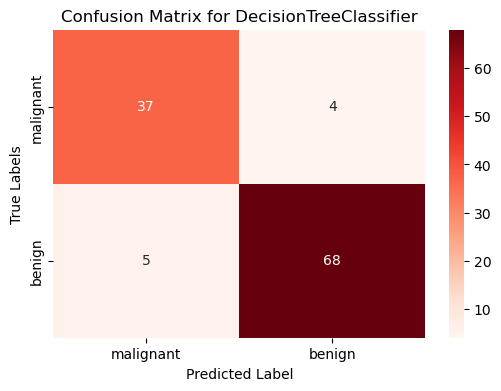

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap="Reds", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for DecisionTreeClassifier")

### Precision

In [18]:
from sklearn.metrics import precision_score

TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
FP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 1])

precision_tree = TP/ (TP + FP)

print(precision_tree)
print(precision_score(y_test, y_pred_tree))

0.9315068493150684
0.9315068493150684


### Recall

In [19]:
from sklearn.metrics import recall_score

TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
FN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 0])

recall_tree = TP/ (TP+FN)

print(recall_tree)
print(recall_score(y_test, y_pred_tree))

0.9444444444444444
0.9444444444444444


### F1 Score

In [20]:
from sklearn.metrics import f1_score

f1_tree = (2* precision_tree * recall_tree) / (precision_tree + recall_tree)

print(f1_tree)
print(f1_score(y_test, y_pred_tree))

0.9379310344827586
0.9379310344827586


### Other Confusion Matrix Matrices

In [21]:
TP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 1])
TN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 0])
FP = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 0 and y_hat == 1])
FN = sum([1 for y, y_hat in zip(y_test, y_pred_tree) if y == 1 and y_hat == 0])

# What percentage of positive instances did we recognize as positive?
TPR = TP/(TP+ FN)

# What percentage of negative instances did we recognize as negative?
TNR = TN/(TN + FP)

# When we classify something as positive, how often is it actually true?
PPV = TP/(TP+FP)

# When we classify something as negative, how often is it actually true?
PPV = TP/(TP+FP)

# False Positive Rate
FPR = FP/(FP+TN)


### ROC Curve and ROC AUC Curve
ROC stands Receiver Operating Characteristics

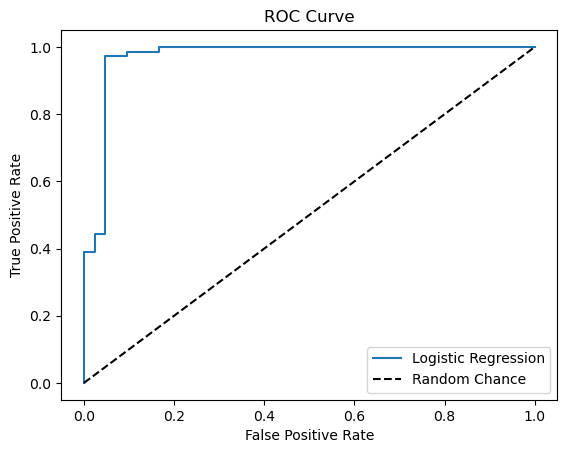

ROC-AUC Score: 0.97


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

### K-Nearest Neighbours(KNN)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


Text(0.5, 1.0, 'Confusion Matrix for KNNClassifier')

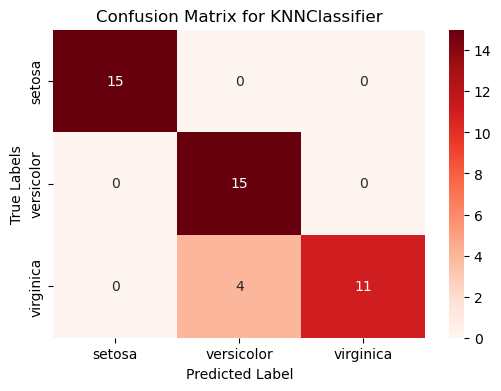

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNNClassifier")


In [ ]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

